# Fashion MNIST with Keras 
This tutorial is taken from the official site of tensorflow.
Link: https://www.tensorflow.org/tutorials/keras/classification

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses `tf.keras`, a high-level API to build and train models in TensorFlow.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


### 1. Import the Fashion MNIST dataset
This guide uses the [Fashion MNIST](http://yann.lecun.com/exdb/mnist/) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here: ![image](https://tensorflow.org/images/fashion-mnist-sprite.png)

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
# Raw data location
!ls data/FashionMNIST/raw/

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


#### Data Loading from raw data

In [3]:
from mnist import MNIST
mndata = MNIST('data/FashionMNIST/raw/')
x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train = np.array(x_train).reshape(60000, 28, 28)
x_test = np.array(x_test).reshape(10000, 28,28)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 2. Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

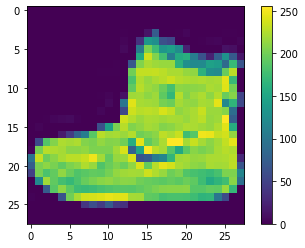

In [4]:
#Plot a single image to check
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:



In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

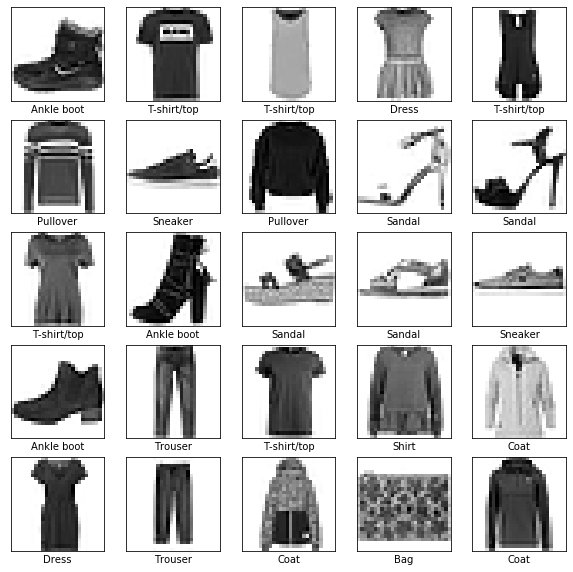

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 3. Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), 
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense layers`. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### 4. Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
* **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [55]:
model.compile(optimizer='adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

### 5. Train the model
Training the neural network model requires the following steps:

#### Feed the training data to the model. 
In this example, the training data is in the `x_train` and `y_train` arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the `x_test` array.
Verify that the predictions match the labels from the test_labels array.
Feed the model
To start training, call the `model.fit` method—so called because it **"fits"** the model to the training data:

In [56]:
model.fit(x_train, y_train, epochs=20)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4740 - accuracy: 0.8292
Epoch 2/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3590 - accuracy: 0.8679
Epoch 3/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3239 - accuracy: 0.8805
Epoch 4/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3020 - accuracy: 0.8871
Epoch 5/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2865 - accuracy: 0.8928
Epoch 6/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2694 - accuracy: 0.8983
Epoch 7/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2585 - accuracy: 0.9017
Epoch 8/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2482 - accuracy: 0.9068
Epoch 9/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2367 - accuracy: 0.9108
Epoch 10/20
60

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


#### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [58]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3563 - accuracy: 0.8911

Test accuracy: 0.8911


#### Make predictions
With the model trained, you can use it to make predictions about some images. The model's linear outputs, `logits`. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [59]:
probability_model = tf.keras.Sequential([model, tf. keras.layers.Softmax()])

In [60]:
predictions = probability_model.predict(x_test)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [61]:
predictions[0]

array([2.6014176e-08, 7.0545120e-10, 4.0720513e-14, 3.3744141e-10,
       4.1562265e-09, 3.6414754e-06, 5.6800129e-12, 8.9032057e-04,
       7.6025276e-11, 9.9910599e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [62]:
print(np.argmax(predictions[0]), '---->> ', y_test[0])


9 ---->>  9


So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [63]:
class_predictions = np.argmax(predictions, axis=1)

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [64]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label],
                                         color=color))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

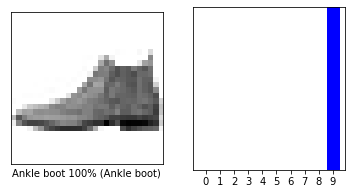

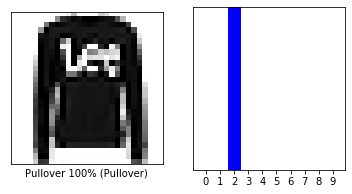

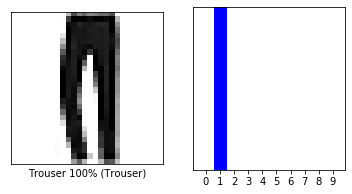

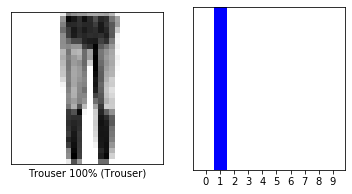

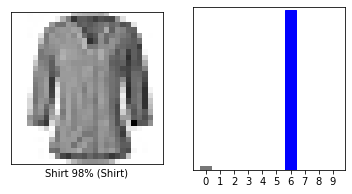

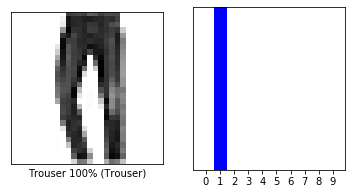

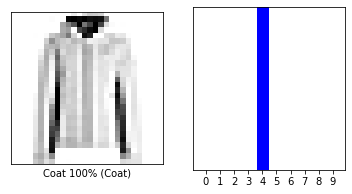

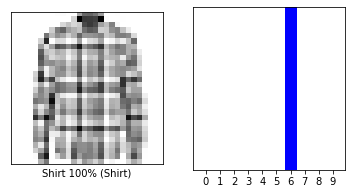

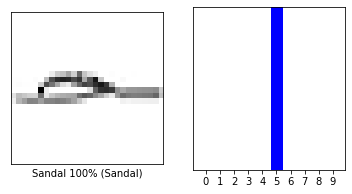

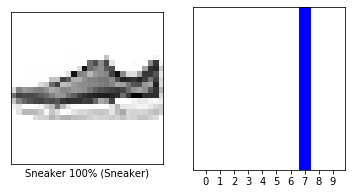

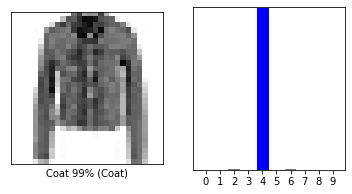

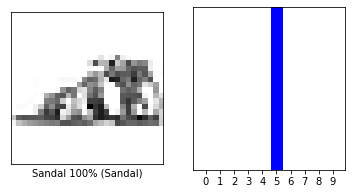

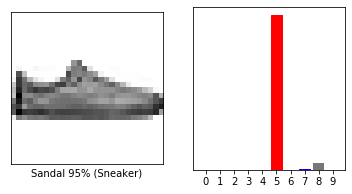

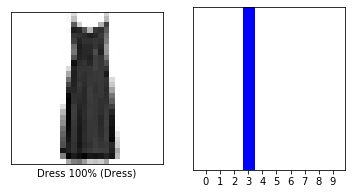

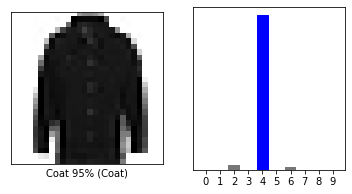

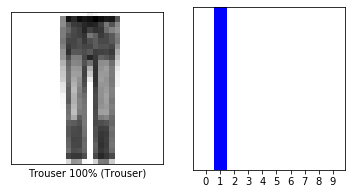

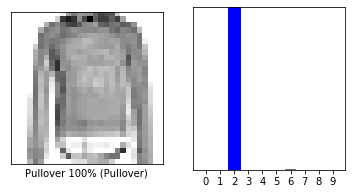

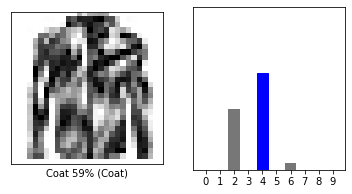

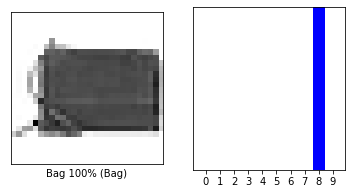

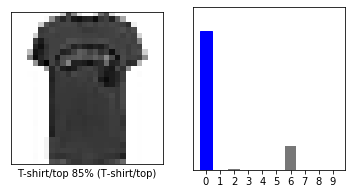

In [65]:
for i in range(20):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  y_test)
    plt.show()

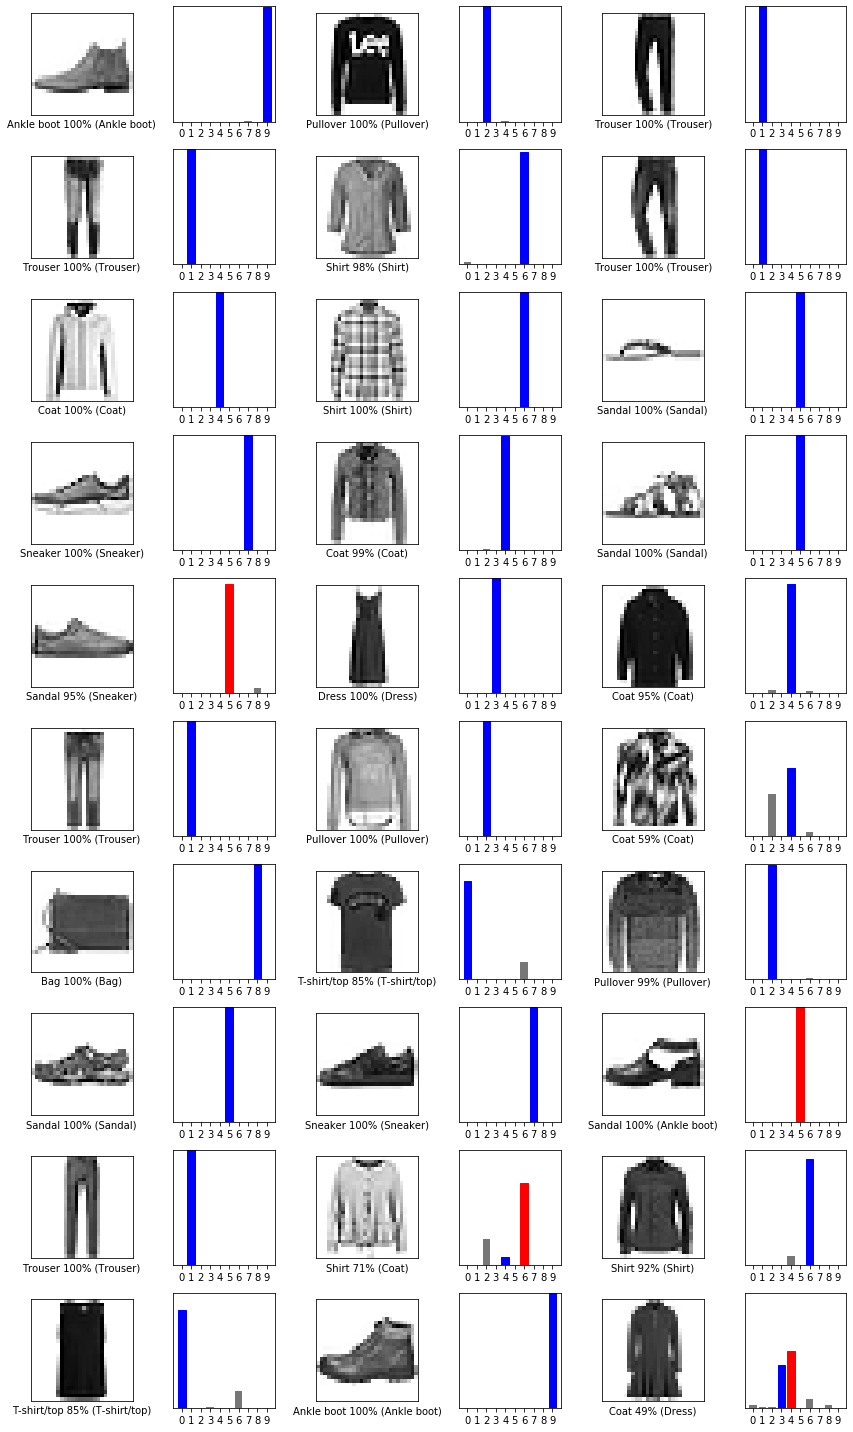

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [69]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)


(28, 28)


(28, 28)

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:


In [70]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


(1, 28, 28)


(1, 28, 28)

In [72]:
# Now predict the correct label for this image:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[3.4191260e-07 7.2285303e-12 9.9928051e-01 1.8219845e-13 6.2304962e-04
  1.6233574e-11 9.6086289e-05 2.3253995e-16 1.2047499e-13 1.2828940e-18]]


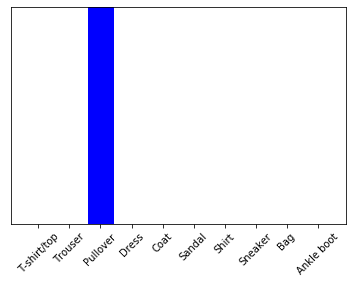

In [74]:

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)


keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [75]:
np.argmax(predictions_single[0])

2